<a href="https://colab.research.google.com/github/samintelguru/StudentPerformanceProject/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AND IT BEGINS

In [1]:
import pandas as pd

# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/StudentPerformanceFactors.csv')

# Exploring my dataset
print(df.head())
print(df.info())
print(df.describe())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [2]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values
# ->no missing values

# Adding inspection calls to diagnose the missing columns
print("DataFrame head before get_dummies:")
display(df.head())
print("\nDataFrame info before get_dummies:")
display(df.info())

# Encode categorical variables
# One-hot encoding for nominal
df = pd.get_dummies(df, columns=['School_Type', 'Gender', 'Access_to_Resources'], prefix=['School', 'Gender', 'Access'])

# Label encoding for ordinal
le = LabelEncoder()
df['Motivation_Level'] = le.fit_transform(df['Motivation_Level'])  # Low=0, Medium=1, High=2
df['Parental_Involvement'] = le.fit_transform(df['Parental_Involvement'])

# Cap outliers (IQR method)
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
df['Hours_Studied'] = df['Hours_Studied'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

# Select relevant columns
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Motivation_Level', 'Parental_Involvement'] + \
           [col for col in df.columns if col.startswith(('School_', 'Gender_', 'Access_'))]
df = df[features + ['Exam_Score']]

# Adding inspection calls after selecting relevant columns
print("\nDataFrame head after selecting relevant columns:")
display(df.head())
print("\nDataFrame info after selecting relevant columns:")
display(df.info())

DataFrame head before get_dummies:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



DataFrame info before get_dummies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influen

None


DataFrame head after selecting relevant columns:


,Hours_Studied,Attendance,Sleep_Hours,Motivation_Level,Parental_Involvement,School_Private,School_Public,Gender_Female,Gender_Male,Access_High,Access_Low,Access_Medium,Exam_Score
0,23,84,7,1,1,False,True,False,True,True,False,False,67
1,19,64,8,1,1,False,True,True,False,False,False,True,61
2,24,98,7,2,2,False,True,False,True,False,False,True,74
3,29,89,8,2,1,False,True,False,True,False,False,True,71
4,19,92,6,2,2,False,True,True,False,False,False,True,70



DataFrame info after selecting relevant columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Hours_Studied         6607 non-null   int64
 1   Attendance            6607 non-null   int64
 2   Sleep_Hours           6607 non-null   int64
 3   Motivation_Level      6607 non-null   int64
 4   Parental_Involvement  6607 non-null   int64
 5   School_Private        6607 non-null   bool 
 6   School_Public         6607 non-null   bool 
 7   Gender_Female         6607 non-null   bool 
 8   Gender_Male           6607 non-null   bool 
 9   Access_High           6607 non-null   bool 
 10  Access_Low            6607 non-null   bool 
 11  Access_Medium         6607 non-null   bool 
 12  Exam_Score            6607 non-null   int64
dtypes: bool(7), int64(6)
memory usage: 355.0 KB


None

##EDA

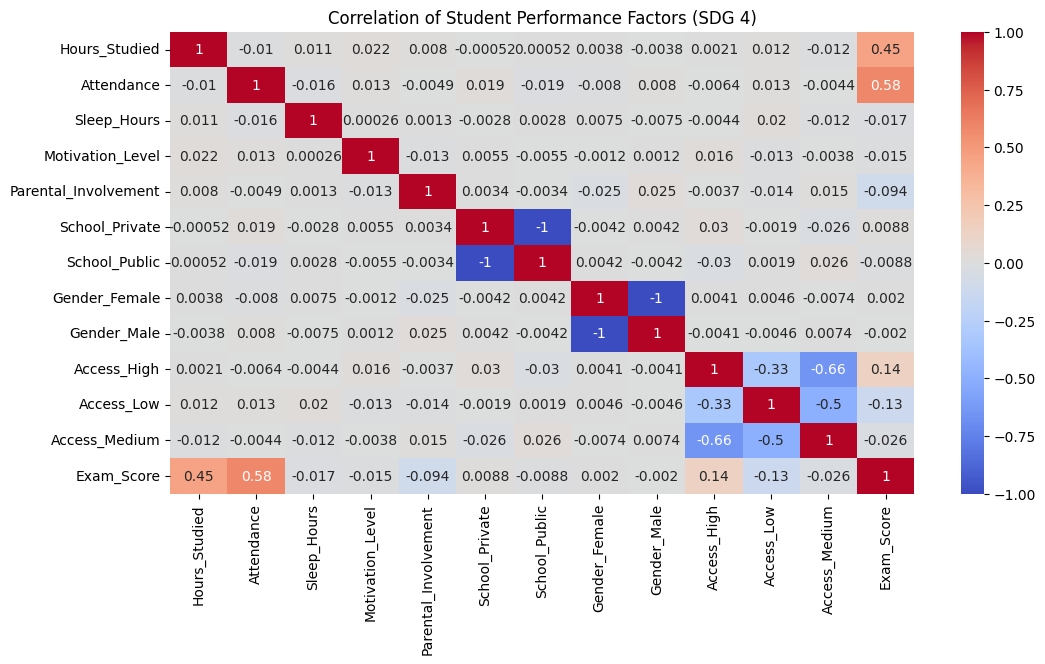

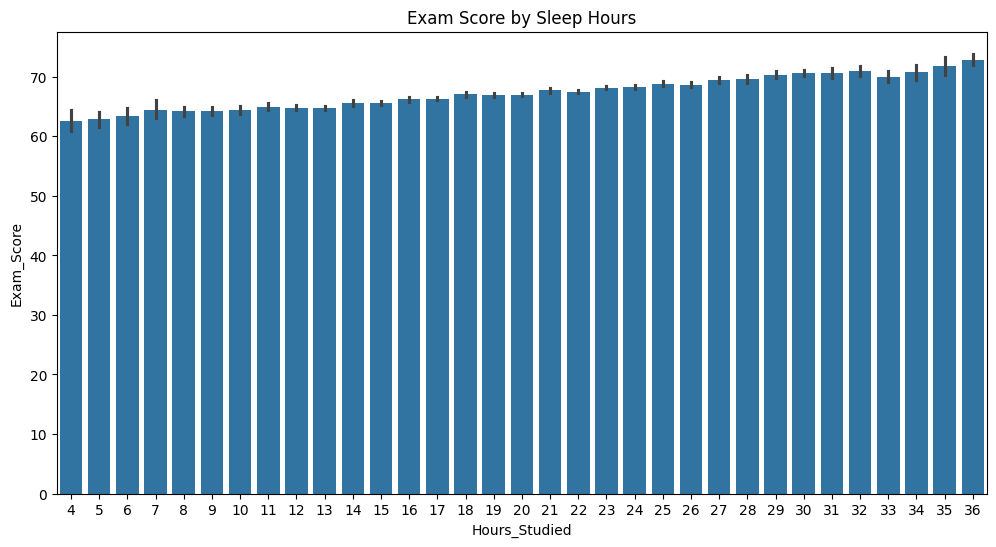

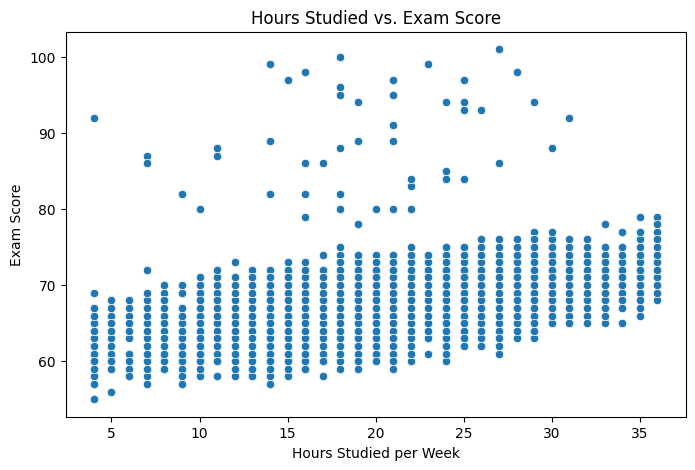

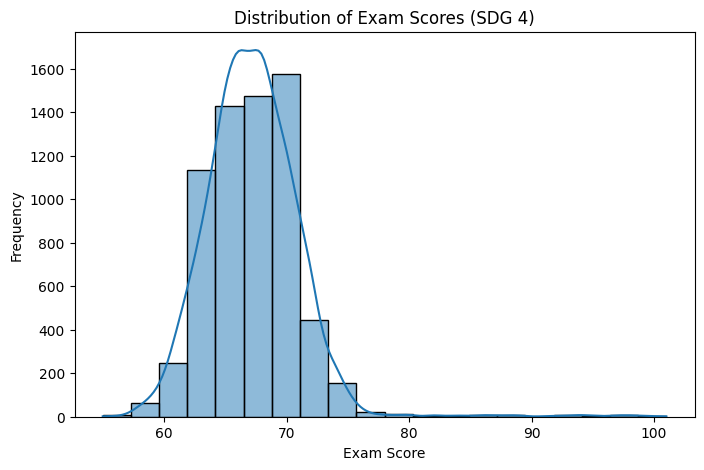

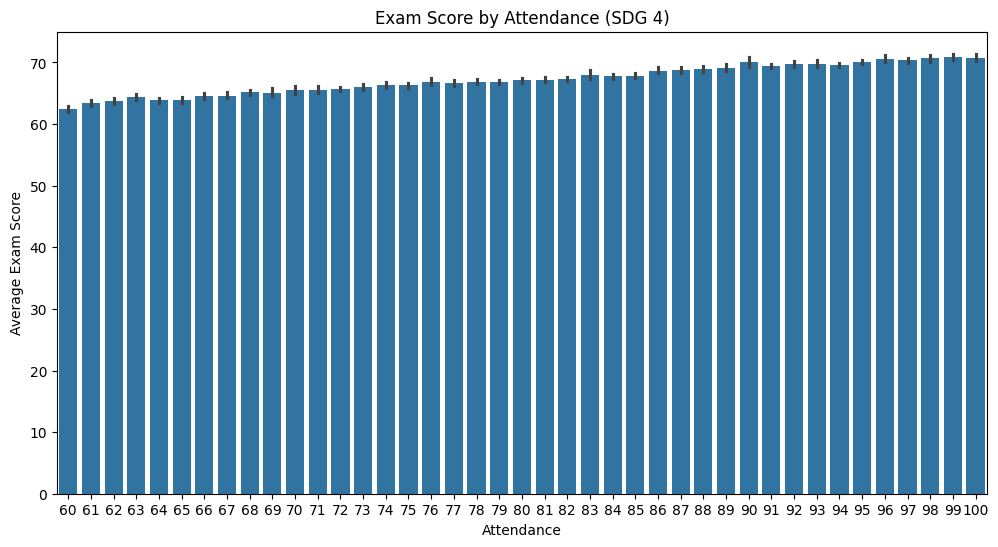

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Student Performance Factors (SDG 4)')
plt.savefig('heatmap.png')
plt.show()

# Bar plot: Exam Score by Hours Studied
plt.figure(figsize=(12, 6))
sns.barplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Exam Score by Sleep Hours')
plt.savefig('barplot.png')
plt.show()

# Scatter plot: Hours Studied vs. Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.savefig('scatter_hours_score.png')
plt.show()

# Histogram: Exam Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores (SDG 4)')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.savefig('histogram_score.png')
plt.show()

# Bar plot: Exam Score by Attendance
plt.figure(figsize=(12, 6))
sns.barplot(x='Attendance', y='Exam_Score', data=df)
plt.title('Exam Score by Attendance (SDG 4)')
plt.xlabel('Attendance')
plt.ylabel('Average Exam Score')
plt.savefig('barplot_income.png')
plt.show()

##Model Training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# My features and target
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

R² Score: 0.57
